In [1]:
num_layers = 1
learning_rate = 0.2
epochs = 20
batch_size = 16

In [2]:
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import pennylane as qml
from pennylane.templates.embeddings import AngleEmbedding
from pennylane.templates.layers import StronglyEntanglingLayers
from pennylane.init import strong_ent_layers_uniform
from pennylane.optimize import GradientDescentOptimizer

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

In [4]:
#train/test split and pre-processing
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler


from numpy import loadtxt
# load array
X_train = loadtxt('X_train_ST2_N10.csv', delimiter=',')
y_train = loadtxt('y_train_ST2_N10.csv', delimiter=',')
X_val = loadtxt('X_val_ST2_N10.csv', delimiter=',')
y_val = loadtxt('y_val_ST2_N10.csv', delimiter=',')
X_test = loadtxt('X_test_ST2_N10.csv', delimiter=',')
y_test = loadtxt('y_test_ST2_N10.csv', delimiter=',')
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#scaler = StandardScaler().fit(X_test)
#X_test = scaler.transform(X_test)

#if model is fit on X_train_scaled, the scaler needs to be passed as transformer to show_clf2d 

In [5]:
padding = 0 * np.ones((len(X_train), 1))
X_train = np.c_[np.c_[X_train, padding], ]
padding = 0 * np.ones((len(X_test), 1))
X_test = np.c_[np.c_[X_test, padding], ]
import pandas as pd
y = pd.DataFrame.from_dict(y_train) 
y = y.iloc[:, :]
y_train = y[0].apply(lambda x: 1 if x <= 0 else 0)
y_train = y_train.to_numpy()
y = pd.DataFrame.from_dict(y_test) 
y = y.iloc[:, :]
y_test = y[0].apply(lambda x: 1 if x <= 0 else 0)
y_test = y_test.to_numpy()

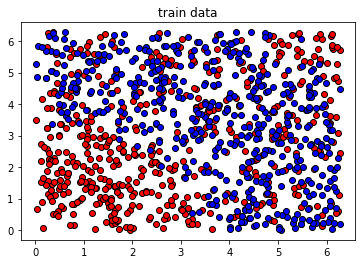

In [6]:
plt.figure()
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c="r", marker="o", edgecolors="k")
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c="b", marker="o", edgecolors="k")
plt.title("train data")
plt.show()

Epoch:  0 | Cost: 0.370712 | Train accuracy: 0.489000 | Test Accuracy: 0.513333


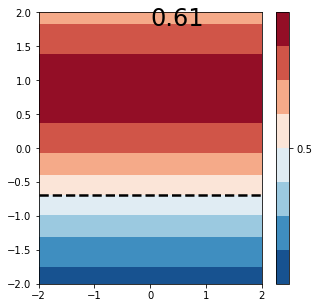

Epoch:  1 : Loss: 0.249040 : Train accuracy: 0.583000 :Test accuracy: 0.610000


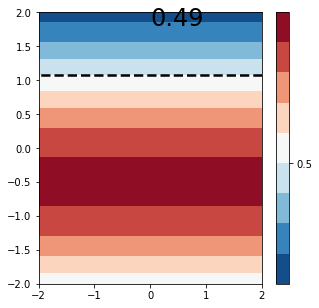

Epoch:  2 : Loss: 0.253158 : Train accuracy: 0.463000 :Test accuracy: 0.486000


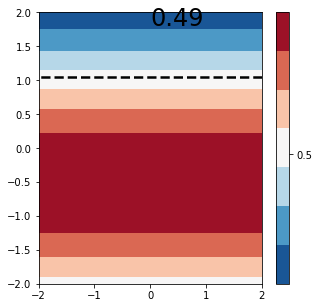

Epoch:  3 : Loss: 0.254455 : Train accuracy: 0.460000 :Test accuracy: 0.486000


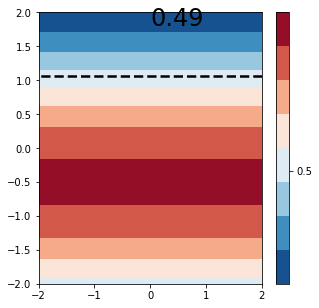

Epoch:  4 : Loss: 0.254807 : Train accuracy: 0.463000 :Test accuracy: 0.486000


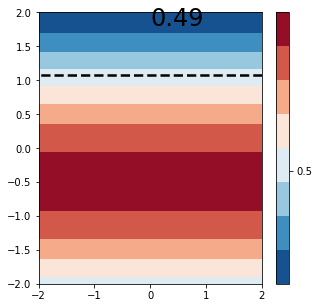

Epoch:  5 : Loss: 0.254950 : Train accuracy: 0.464000 :Test accuracy: 0.488000


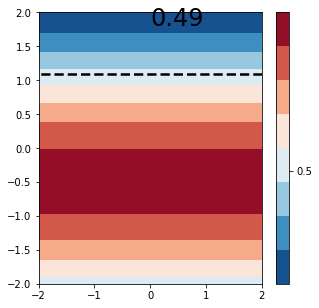

Epoch:  6 : Loss: 0.255031 : Train accuracy: 0.467000 :Test accuracy: 0.489333


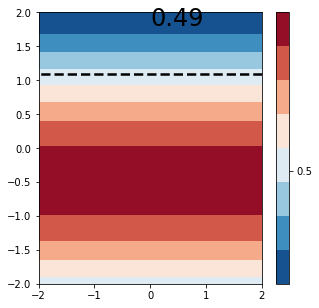

Epoch:  7 : Loss: 0.255083 : Train accuracy: 0.467000 :Test accuracy: 0.490000


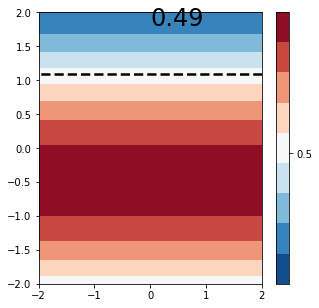

Epoch:  8 : Loss: 0.255119 : Train accuracy: 0.466000 :Test accuracy: 0.492667


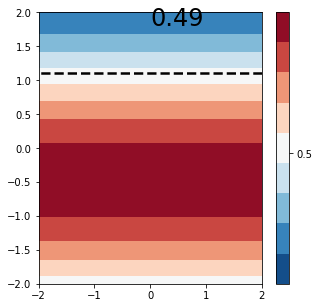

Epoch:  9 : Loss: 0.255146 : Train accuracy: 0.465000 :Test accuracy: 0.493333


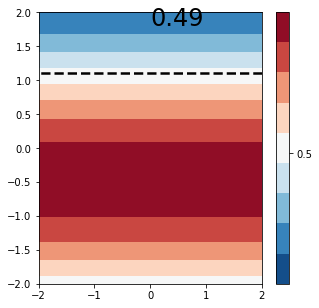

Epoch: 10 : Loss: 0.255167 : Train accuracy: 0.464000 :Test accuracy: 0.494667


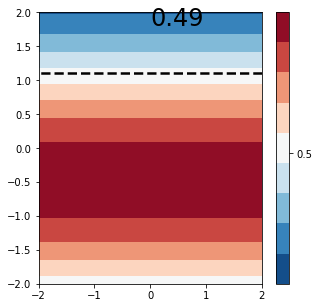

Epoch: 11 : Loss: 0.255183 : Train accuracy: 0.464000 :Test accuracy: 0.494667


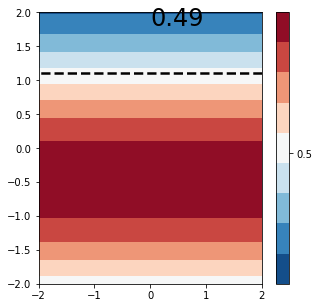

Epoch: 12 : Loss: 0.255197 : Train accuracy: 0.464000 :Test accuracy: 0.494667


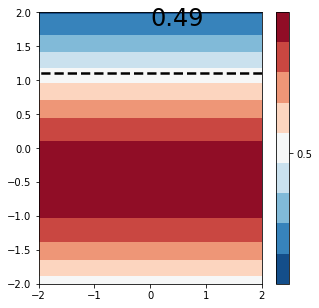

Epoch: 13 : Loss: 0.255208 : Train accuracy: 0.464000 :Test accuracy: 0.494667


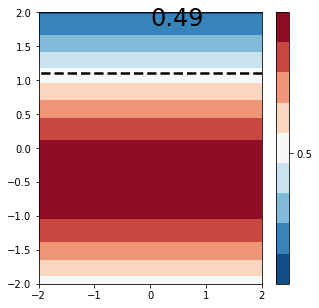

Epoch: 14 : Loss: 0.255217 : Train accuracy: 0.464000 :Test accuracy: 0.494667


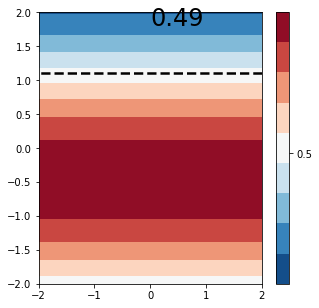

Epoch: 15 : Loss: 0.255224 : Train accuracy: 0.464000 :Test accuracy: 0.494667


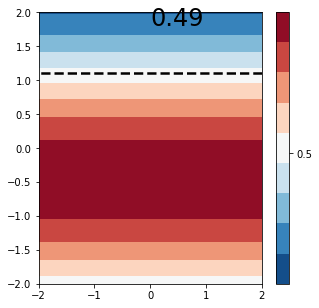

Epoch: 16 : Loss: 0.255231 : Train accuracy: 0.464000 :Test accuracy: 0.494667


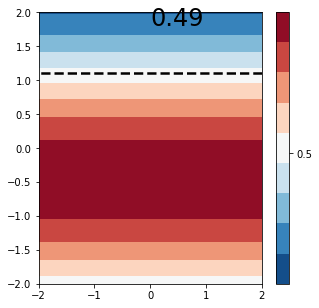

Epoch: 17 : Loss: 0.255237 : Train accuracy: 0.465000 :Test accuracy: 0.494667


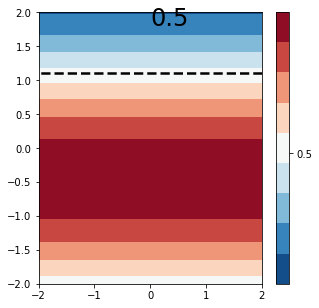

Epoch: 18 : Loss: 0.255242 : Train accuracy: 0.465000 :Test accuracy: 0.495333


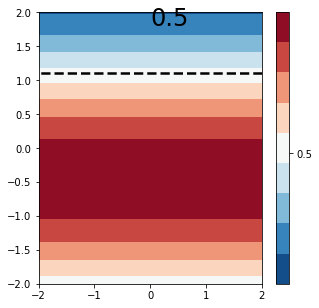

Epoch: 19 : Loss: 0.255246 : Train accuracy: 0.465000 :Test accuracy: 0.495333


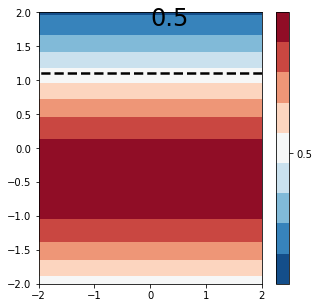

Epoch: 20 : Loss: 0.255250 : Train accuracy: 0.465000 :Test accuracy: 0.495333


Total time:  189.23904871940613  sec 


num_layers:  1
learning_rate:  0.2
epochs:  20
batch_size:  16


Confusion Matrix
RdBu_r


PRINT AUCROC VALUES
0.6123717257546253
0.4865301984261092
0.48632635435609417
0.4865301984261092
0.4886947005906114
0.49003577999860526
0.490757280720106
0.4935413615711014
0.4942628622926021
0.49560394170059596
0.49560394170059596
0.49560394170059596
0.49560394170059596
0.49560394170059596
0.49560394170059596
0.49560394170059596
0.4955020196655885
0.49612159835208164
0.49612159835208164
0.49612159835208164


In [7]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.base import clone
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix


dev = qml.device("default.qubit", wires=1)
# Install any pennylane-plugin to run on some particular backend


@qml.qnode(dev)
def qcircuit(params, x=None, y=None):
    """A variational quantum circuit representing the Universal classifier.

    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    for p in params:
        qml.Rot(*x, wires=0)
        qml.Rot(*p, wires=0)
    return qml.expval(qml.Hermitian(y, wires=[0]))


def cost(params, x, y, state_labels=None):
    """Cost function to be minimized.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d array of input vectors
        y (array[float]): 1-d array of targets
        state_labels (array[float]): array of state representations for labels

    Returns:
        float: loss value to be minimized
    """
    # Compute prediction for each input in data batch
    loss = 0.0
    dm_labels = [density_matrix(s) for s in state_labels]
    for i in range(len(x)):
        f = qcircuit(params, x=x[i], y=dm_labels[y[i]])
        loss = loss + (1 - f) ** 2
    return loss / len(x)



def test(params, x, y, state_labels=None):
    """
    Tests on a given set of data.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d array of input vectors
        y (array[float]): 1-d array of targets
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        predicted (array([int]): predicted labels for test data
        output_states (array[float]): output quantum states from the circuit
    """
    fidelity_values = []
    dm_labels = [density_matrix(s) for s in state_labels]
    predicted = []

    for i in range(len(x)):
        fidel_function = lambda y: qcircuit(params, x=x[i], y=y)
        fidelities = [fidel_function(dm) for dm in dm_labels]
        best_fidel = np.argmax(fidelities)

        predicted.append(best_fidel)
        fidelity_values.append(fidelities)

    return np.array(predicted), np.array(fidelity_values)


def accuracy_score(y_true, y_pred):
    """Accuracy score.

    Args:
        y_true (array[float]): 1-d array of targets
        y_predicted (array[float]): 1-d array of predictions
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        score (float): the fraction of correctly classified samples
    """
    score = y_true == y_pred
    return score.sum() / len(y_true)


def iterate_minibatches(inputs, targets, batch_size):
    """
    A generator for batches of the input data

    Args:
        inputs (array[float]): input data
        targets (array[float]): targets

    Returns:
        inputs (array[float]): one batch of input data of length `batch_size`
        targets (array[float]): one batch of targets of length `batch_size`
    """
    for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
        idxs = slice(start_idx, start_idx + batch_size)
        yield inputs[idxs], targets[idxs]
        
        
        
        
def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return state * np.conj(state).T
label_0 = [[1], [0]]
label_1 = [[0], [1]]
state_labels = [label_0, label_1]


def model_oostest( y_test, predicted_test):
    fpr, tpr, thresholds = roc_curve(y_test, predicted_test)
    auc = roc_auc_score(y_test, predicted_test)
#    print("AUCROC ",auc)

    cm = confusion_matrix(y_test, predicted_test)
#    print("Confusion Matrix:")
#    print(cm)
    return auc,cm

auca = dict() #variable to store AUC values 



# Generate training and test data


#Xdata, y_train = circle(num_training)
X_train 
#Xtest, y_test = circle(num_test)
X_test 


# Train using Adam optimizer and evaluate the classifier
#num_layers = 3
#learning_rate = 0.6
#epochs = 5
#batch_size = 32
import random
import time
import sys
start = time.time()


opt = AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999)

# initialize random weights
params = np.random.uniform(size=(num_layers, 3))

predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
accuracy_train = accuracy_score(y_train, predicted_train)

predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
accuracy_test = accuracy_score(y_test, predicted_test)

# save predictions with random weights for comparison
initial_predictions = predicted_test

loss = cost(params, X_test, y_test, state_labels)

print(
    "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        0, loss, accuracy_train, accuracy_test
    )
)

for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(X_train, y_train, batch_size=batch_size):
        params = opt.step(lambda v: cost(v, Xbatch, ybatch, state_labels), params)

    predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = cost(params, X_train, y_train, state_labels)
    predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
    accuracy_test = accuracy_score(y_test, predicted_test)
    res = [it + 1, loss, accuracy_train, accuracy_test]
    auca[it],cm=model_oostest( y_test, predicted_test) #print CONFUSION MATRIX AND AUCROC
    
    num = 20
    cm = 'RdBu_r'
    fig= plt.figure(figsize=(5,5))
    xx, yy = np.meshgrid(np.linspace(-2, 2, num), np.linspace(-2, 2, num))
    zz = []
    zz_pred = []
    for i in range(num):
            for j in range(num):
                center = np.array([0, 0])
                radius = np.sqrt(2 / np.pi)
                x = xx[i, j]
                y = yy[i, j]
                z = 1 if np.linalg.norm(np.array((x, y)) - center) < radius else 0
                r = test(params, [[x, y, 0]], [z], state_labels)
                zz_pred.append(r[1][0][0])                    
                zz.append(z)

    zz = np.reshape(zz, (num, num))
    zz_pred = np.reshape(zz_pred, (num, num))
    cnt = plt.contourf(xx, yy, zz_pred,cmap=cm)
    plt.contourf(xx, yy, zz_pred,cmap=cm)
    plt.contour(xx, yy,zz_pred, levels=[0.5], colors=("black",), linestyles=("--",), linewidths=(2.5,))
    plt.text(0,1.8,round(accuracy_test,2), fontsize=24)
    plt.colorbar(cnt, ticks=[0, 1, 0.5])
    plt.show()
    
    
    
    print(
        "Epoch: {:2d} : Loss: {:3f} : Train accuracy: {:3f} :Test accuracy: {:3f}".format(
            *res  )
    
    
    
    )
print("")
print("") 
print("Total time: ", time.time() - start," sec ")
print("")
print("") 
print("num_layers: ",num_layers)
print("learning_rate: ",learning_rate)
print("epochs: ",epochs)
print("batch_size: ",batch_size)
print("")
print("") 
print("Confusion Matrix") 
print(cm)
print("")
print("")  
print("PRINT AUCROC VALUES")
for key, value in auca.items():
    print(value)

Cost: 0.255250 | Train accuracy 0.465000 | Test Accuracy : 0.495333
Learned weights
Layer 0: [ 1.63066078 -1.45174268  0.58300939]


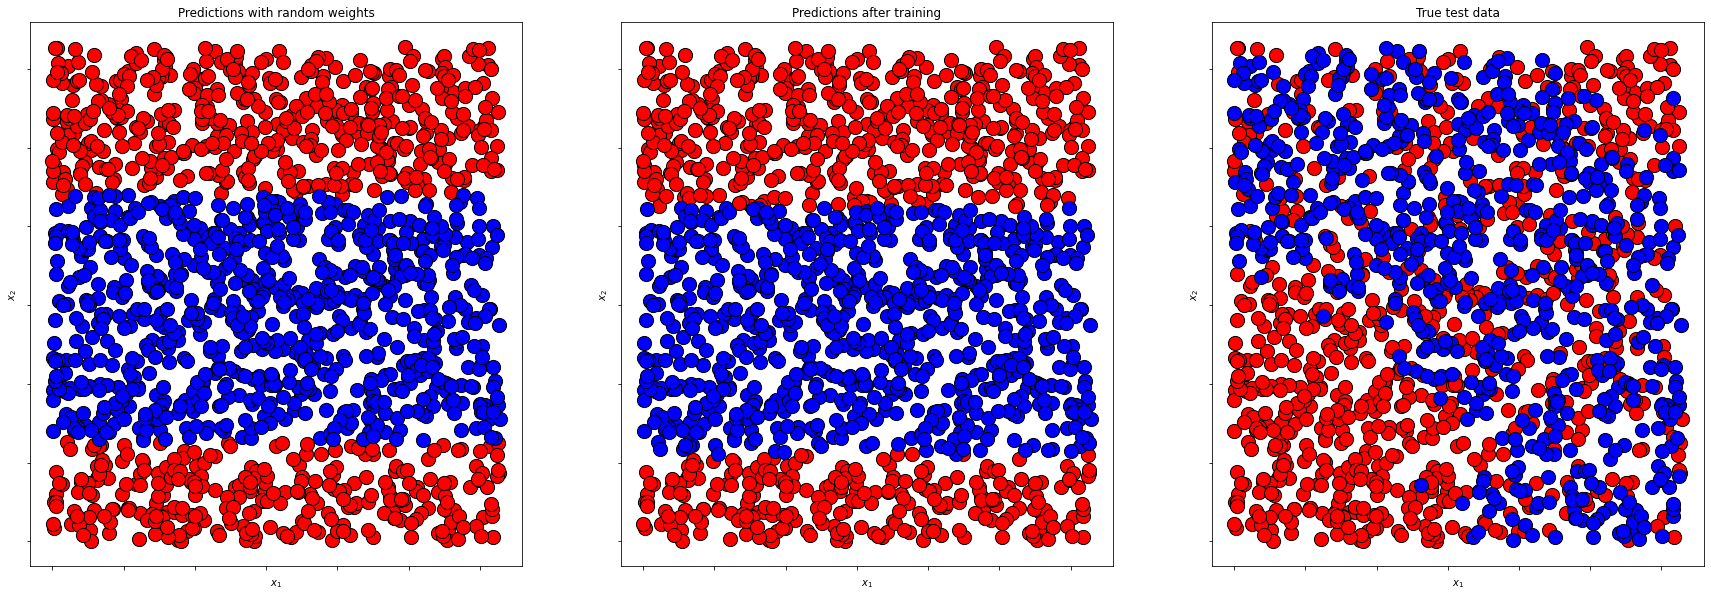

In [8]:
def plot_data(x, y, fig=None, ax=None):
    """
    Plot data with red/blue values for a binary classification.

    Args:
        x (array[tuple]): array of data points as tuples
        y (array[int]): array of data points as tuples
    """
    if fig == None:
        fig, ax = plt.subplots(10, 10, figsize=(50, 50))
    reds = y == 0
    blues = y == 1
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=200, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=200, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: {}".format(i, params[i]))


fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plot_data(X_test, initial_predictions, fig, axes[0])
plot_data(X_test, predicted_test, fig, axes[1])
plot_data(X_test, y_test, fig, axes[2])
axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])
axes[2].set_yticklabels([])
axes[2].set_xticklabels([])
plt.show()

In [9]:

    fpr, tpr, thresholds = roc_curve(y_test, predicted_test)
    
    try:
        auc = roc_auc_score(y_test, predicted_test)
    except ValueError:
        print("There's only one class in the test set, AUC cannot be calculated")

        auc = np.nan

    print("AUC {:.3f}".format(auc))

   

AUC 0.496


AUCROC: 0.49612159835208164


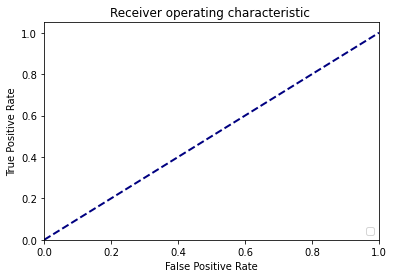

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
import tensorflow as tf
fpr = dict()
tpr = dict()
roc_auc = dict()
print("AUCROC:" ,roc_auc_score(y_test, predicted_test))
for i in range(len(y_test)):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicted_test)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predicted_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(accuracy_score(y_test, predicted_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
plt.show()


AUCROC: 0.49612159835208164


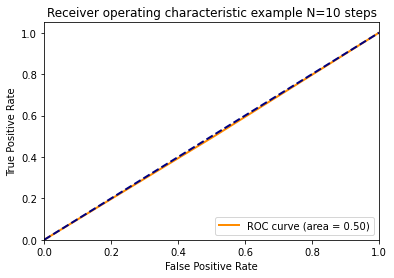

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
print("AUCROC:" ,roc_auc_score(y_test, predicted_test))
for i in range(len(y_test)):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicted_test)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predicted_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Ν=10 steps')
plt.legend(loc="lower right")
plt.show()

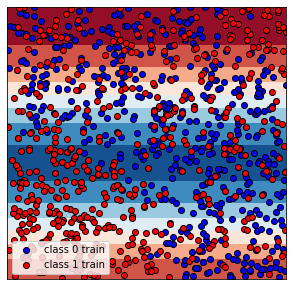

In [12]:
num = 20
cm = 'RdBu_r'
fig= plt.figure(figsize=(5,5))


xx, yy = np.meshgrid(np.linspace(-0, 2*np.pi, num), np.linspace(-0, 2*np.pi, num))

center = np.array([0, 0])
radius = np.sqrt(2 / np.pi)

zz = []
zz_pred = []

for i in range(num):
    for j in range(num):
        x = xx[i, j]
        y = yy[i, j]
        z = 1 if np.linalg.norm(np.array((x, y)) - center) < radius else 0
        
        r = test(params, [[x, y, 0]], [z], state_labels)
        zz_pred.append(r[1][0][0])
        
        zz.append(z)

zz = np.reshape(zz, (num, num))
zz_pred = np.reshape(zz_pred, (num, num))


cnt = plt.contourf(xx, yy, zz_pred,cmap=cm)
plt.contourf(xx, yy, zz_pred,cmap=cm)
#plt.colorbar(cnt, ticks=[0, 1, 0.5])


plt.scatter(
    X_train[:, 0][y_train == 1],
    X_train[:, 1][y_train == 1],
    c="b",
    marker="o",
    edgecolors="k",
    label="class 0 train",)

plt.scatter(
    X_train[:, 0][y_train == 0],
    X_train[:, 1][y_train == 0],
    c="r",
    marker="o",
    edgecolors="k",
    label="class 1 train",
)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.legend()
plt.show()

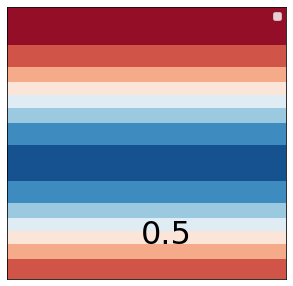

In [13]:
num = 20
cm = 'RdBu_r'
fig= plt.figure(figsize=(5,5))


xx, yy = np.meshgrid(np.linspace(-0, 2*np.pi, num), np.linspace(-0, 2*np.pi, num))

center = np.array([0, 0])
radius = np.sqrt(2 / np.pi)

zz = []
zz_pred = []

for i in range(num):
    for j in range(num):
        x = xx[i, j]
        y = yy[i, j]
        z = 1 if np.linalg.norm(np.array((x, y)) - center) < radius else 0
        
        r = test(params, [[x, y, 0]], [z], state_labels)
        zz_pred.append(r[1][0][0])
        
        zz.append(z)

zz = np.reshape(zz, (num, num))
zz_pred = np.reshape(zz_pred, (num, num))


cnt = plt.contourf(xx, yy, zz_pred,cmap=cm)
plt.contourf(xx, yy, zz_pred,cmap=cm)
#plt.colorbar(cnt, ticks=[0, 1, 0.5])


plt.text(3,0.8,round(roc_auc["micro"],2), fontsize=32)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.legend()
plt.show()

In [14]:
print("Test Accuracy = ",accuracy_score(y_test, predicted_test))
print("AUC ROC = ",round(roc_auc["micro"],3))

Test Accuracy =  0.49533333333333335
AUC ROC =  0.496
